## Introduction to logistic regression (multiclass classification)
Link to the Youtube video tutorial: https://www.youtube.com/watch?v=J5bXOOmkopc&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=9




In [281]:
%matplotlib inline
import matplotlib.pyplot as plt

### Load the dataset

In [282]:
# import the sklearn ready-made datasets of handwritten digits 
# the datasets consists of 1797 handwritten digit images in the size of 8x8
from sklearn.datasets import load_digits 

# load the dataset into the variable called digits
digits = load_digits() 

### Dataset visualization

#### Show what the loaded dataset contains (the attributes of the dataset)

In [283]:
'''
the data of the dataset (under digits) contains the numerical data corresponding to each of the images of the dataset, 
the images of the dataset (under digits) contains the actual image corresponding to each of the numerical data,
the target of the dataset (under digits) contains the label (EG: The value shown by an image) corresponding to each of the actual images/numerical data.
When use the dataset to train a machine learning model, the data of the datast (under digits) is the independent variable (feature),
while the target of the dataset (under digits) is the dependent variable (ground truth)  
'''
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


#### Show the name of all labels/categories available in the dataset as a list in ascending order

This list will be used as the parameter of labels of the confusion matrix at later stage

In [284]:
import pandas as pd
# create a simple pandas series from a list of target of the dataset (under digits)
categorical_label_list = pd.Series(digits.target)
# get the name of all labels/categories available in the target of the dataset (under digits)
name_categorical_label_list = categorical_label_list.value_counts().index
# sort the name of all labels/categories available in the target of the dataset (under digits) in ascending order
name_categorical_label_list_sorted = name_categorical_label_list.sort_values(ascending=True)
# show the sorted name of all labels/categories available in the target of the dataset (under digits) in ascending order
print(name_categorical_label_list_sorted)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int32')


#### Show the information of the 1st image of the dataset

In data under digits, each image (8x8 size) in the dataset is represented as a 1D array numerical data of 8x8=64 elements 

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
The label of the 1st image (the value shown by the image): 0


<Figure size 640x480 with 0 Axes>

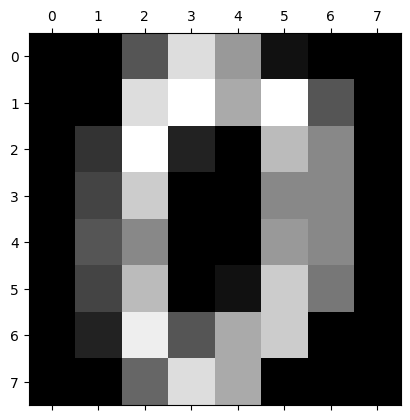

In [285]:
# acessing data to show the 1D array numerical data of the 1st image of the dataset
print(digits.data[0])

# set the colormap to "gray"
plt.gray() 

# show the actual image of the 1st image of the dataset
plt.matshow(digits.images[0])

# show the label of the 1st image
print('The label of the 1st image (the value shown by the image):', digits.target[0]) 

#### Show the information of the first five images of the dataset
Show the actual image of the first five images of the dataset

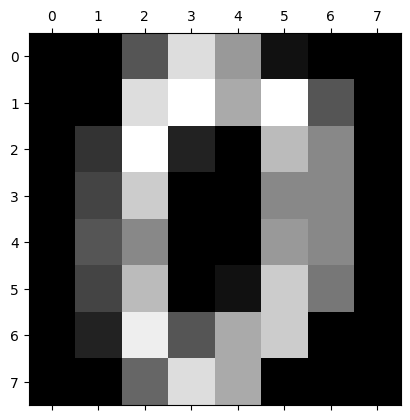

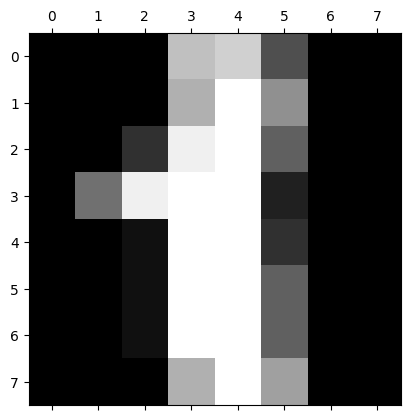

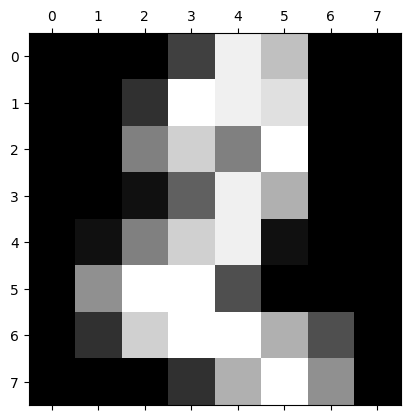

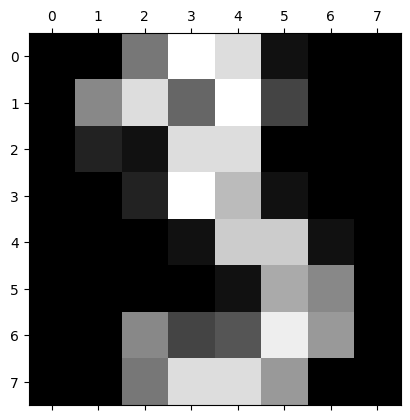

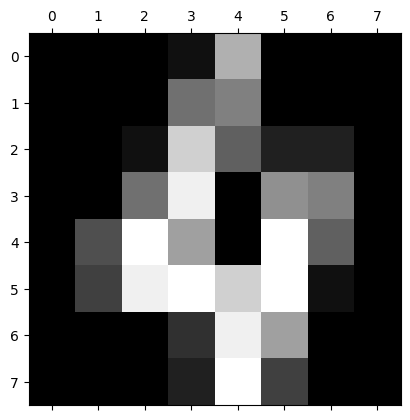

In [286]:
for i in range(5):
    plt.matshow(digits.images[i])

### Data preprocessing

Split dataset into training and testing data using train_test_split() method

In [287]:
from sklearn.model_selection import train_test_split

# the data of the datast (under digits) is the independent variable (feature),
# the target of the dataset (under digits) is the dependent variable (ground truth)  
# split 20% of the dataset into test set, 80% of the dataset into train set
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

# check the number of samples in the train set and test set
print('The train set consists of '+ str(len(X_train)) + ' sample(s) and the test set consists of '+ str(len(X_test)) + ' sample(s)')


The train set consists of 1437 sample(s) and the test set consists of 360 sample(s)


### Develop the machine learning model (logistic regression model)

Information retrieved from: https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
<img src="hidden\convergencewarning.png" alt="This image describes the solution for convergence warning" style="width: 400px;"/>

In [288]:
from sklearn.linear_model import LogisticRegression

# create the machine learning model (logistic regression model)
model = LogisticRegression(solver='lbfgs', max_iter=1000) 
'''
(solver='lbfgs', max_iter=1000) used to solve the convergence warning occur in this example. 
These arguments are not needed if the LogisticRegression() can run without convergence warning occurs.
'''

# train the logistic regression model
model.fit(X_train,Y_train) 

# show the accuracy of the trained logistic regression model
print('The accuracy of the trained logistic regression model:',model.score(X_test,Y_test)) 


The accuracy of the trained logistic regression model: 0.9583333333333334


### Apply the trained machine learning model (logistic regression model)

#### Predict a given sample

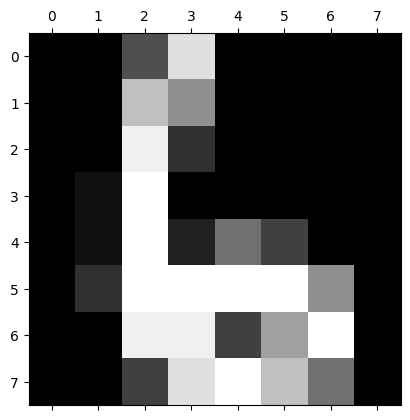

In [289]:
# randomly choose a sample from the dataset

# show the actual image of the randomly chosen sample
plt.matshow(digits.images[67])

In [290]:
# show the label of the randomly chosen sample
print('The label of the randomly chosen sample (the value shown by the randomly chosen sample):', digits.target[67]) 

# use the trained model to make prediction over the randomly chosen sample
print('The prediction made by the trained sample over the randomly chosen sample:', model.predict([digits.data[67]]))

The label of the randomly chosen sample (the value shown by the randomly chosen sample): 6
The prediction made by the trained sample over the randomly chosen sample: [6]


#### Predict a few given samples

<img src="hidden\slicing.png" alt="This image describes slicing" style="width: 400px;"/>

In [291]:
# show the label of the first 5 samples of the dataset
print('The label of the first 5 samples of the dataset (the value shown by the first 5 samples of the dataset):', digits.target[0:5]) 

# use the trained model to make prediction over the first 5 samples of the dataset
print('The prediction made by the trained sample over the first 5 samples of the dataset:', model.predict(digits.data[0:5]))

The label of the first 5 samples of the dataset (the value shown by the first 5 samples of the dataset): [0 1 2 3 4]
The prediction made by the trained sample over the first 5 samples of the dataset: [0 1 2 3 4]


### Evaluate the performance of the trained machine learning model (logistic regression model)

#### Compute the confusion matrix

In [292]:
# use the trained model to make prediction over the samples in X_test
Y_predicted = model.predict(X_test) 

from sklearn.metrics import confusion_matrix

'''
compute/generate the confusion matrix of the trained model using: 
1) the samples in Y_test (ground truths in test set), 
2) the predictions over the samples in X_test (features in test set),
3) the name of all labels/categories available in the dataset as a list in ascending order
'''
cm = confusion_matrix(Y_test, Y_predicted, labels=name_categorical_label_list_sorted) 
# show the confusion matrix
print(cm) 

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 28  1  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  1  0  0  1  0]
 [ 0  0  0  0 36  0  0  1  0  0]
 [ 0  1  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  1  1 26  0  0  0]
 [ 0  0  0  0  1  0  0 46  0  0]
 [ 0  1  0  0  0  3  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  1 31]]


##### Visualize the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

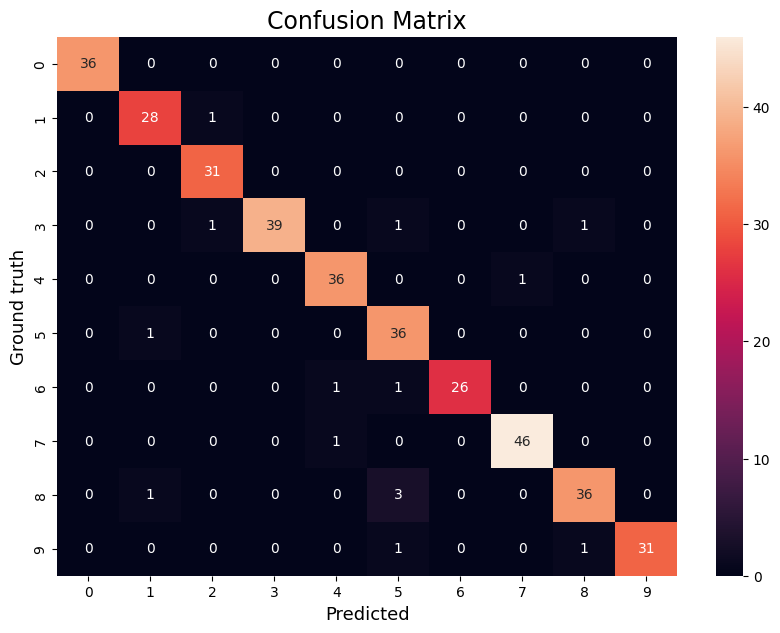

In [293]:
# code for confusion matrix visualization
import seaborn as sn

plt.figure(figsize = (10,7)) # generate a figure window
sn.heatmap(cm, annot=True) # generate a heatmap with the content of variable cm (the confusion matrix). annot=True means show the colorbar beside the heat map
plt.xlabel('Predicted', fontsize=13) # label the x-axis of the heatmap
plt.ylabel('Ground truth', fontsize=13) # label the y-axis of the heatmap
plt.title('Confusion Matrix',fontsize=17) # label the title of the heatmap

#### Generate the classification report

In [294]:
from sklearn.metrics import classification_report

'''
generate the classification report of the trained model using: 
1) the samples in Y_test (ground truths in test set), 
2) the predictions over the samples in X_test (features in test set),
3) the name of all labels/categories available in the dataset as a list in ascending order
'''
cr = classification_report(Y_test, Y_predicted, labels=name_categorical_label_list_sorted)
# show the classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      0.97      0.95        29
           2       0.94      1.00      0.97        31
           3       1.00      0.93      0.96        42
           4       0.95      0.97      0.96        37
           5       0.86      0.97      0.91        37
           6       1.00      0.93      0.96        28
           7       0.98      0.98      0.98        47
           8       0.95      0.90      0.92        40
           9       1.00      0.94      0.97        33

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

